In [1]:
from pymongo import MongoClient
import pprint

home_mongo_server = 'mongodb://localhost:27017'

client = MongoClient(home_mongo_server)

db = client.udacity
osm_data = db.boston_cambridge_osm

In [2]:
# number of top level elements
osm_data.find().count()

342355

In [3]:
# number of nodes
osm_data.find({'tag': 'node'}).count()

294037

In [4]:
# number of ways
osm_data.find({'tag': 'way'}).count()

47703

In [5]:
# number of relations
osm_data.find({'tag': 'relation'}).count()

615

In [6]:
# number of distinct users
len(osm_data.find().distinct('created.user'))

885

In [7]:
# top 20 most popular types of nodes 
pipeline = [{'$match': {'tag': 'node', 'type': {'$exists': True}}}, 
            {'$group': {'_id': '$type', 'count': {'$sum': 1}}}, 
            {'$sort': {'count': -1, '_id': 1}}, 
            {'$limit': 20}]

pprint.pprint(list(osm_data.aggregate(pipeline)))

[{'_id': 'Special', 'count': 27},
 {'_id': 'Academic', 'count': 19},
 {'_id': 'Public', 'count': 16},
 {'_id': 'Private', 'count': 14},
 {'_id': 'School', 'count': 11},
 {'_id': 'Charter', 'count': 3},
 {'_id': 'Special-Law', 'count': 3},
 {'_id': 'Approved Special Education', 'count': 2},
 {'_id': 'County', 'count': 2},
 {'_id': 'Special-Institutional', 'count': 2},
 {'_id': 'Special-Medical', 'count': 2},
 {'_id': 'Collaborative Program', 'count': 1},
 {'_id': 'private', 'count': 1},
 {'_id': 'video', 'count': 1}]


In [8]:
# top 20 most popular amenities
pipeline = [{'$match': {'tag': 'node', 'amenity': {'$exists': True}}}, 
            {'$group': {'_id': '$amenity', 'count': {'$sum': 1}}}, 
            {'$sort': {'count': -1, '_id': 1}}, 
            {'$limit': 20}]

pprint.pprint(list(osm_data.aggregate(pipeline)))

[{'_id': 'restaurant', 'count': 470},
 {'_id': 'bench', 'count': 415},
 {'_id': 'bicycle_parking', 'count': 202},
 {'_id': 'cafe', 'count': 184},
 {'_id': 'library', 'count': 140},
 {'_id': 'fast_food', 'count': 114},
 {'_id': 'school', 'count': 107},
 {'_id': 'bicycle_rental', 'count': 97},
 {'_id': 'place_of_worship', 'count': 92},
 {'_id': 'fountain', 'count': 63},
 {'_id': 'post_box', 'count': 62},
 {'_id': 'waste_basket', 'count': 62},
 {'_id': 'bank', 'count': 59},
 {'_id': 'bar', 'count': 51},
 {'_id': 'pub', 'count': 46},
 {'_id': 'atm', 'count': 36},
 {'_id': 'pharmacy', 'count': 35},
 {'_id': 'parking', 'count': 28},
 {'_id': 'drinking_water', 'count': 27},
 {'_id': 'bicycle_repair_station', 'count': 24}]


In [9]:
# banks with the most atms
pipeline = [{'$match': {'tag': 'node', 'amenity': 'bank', 'atm': 'yes'}}, 
            {'$group': {'_id': '$name', 'count': {'$sum': 1}}}, 
            {'$sort': {'count': -1, '_id': 1}}, 
            {'$limit': 20}]

pprint.pprint(list(osm_data.aggregate(pipeline)))

[{'_id': 'Bank of America', 'count': 6},
 {'_id': 'Citizens Bank', 'count': 5},
 {'_id': 'Santander', 'count': 3},
 {'_id': 'Cambridge Trust Company', 'count': 2},
 {'_id': 'Citibank', 'count': 2},
 {'_id': 'Eastern Bank', 'count': 2},
 {'_id': 'Admirals Bank', 'count': 1},
 {'_id': 'Cambridge Savings Bank', 'count': 1},
 {'_id': 'Cambridge Trust', 'count': 1},
 {'_id': "Citizen's Bank", 'count': 1},
 {'_id': 'MIT Federal Credit Union', 'count': 1},
 {'_id': "People's United Bank", 'count': 1},
 {'_id': 'TD Bank', 'count': 1}]


In [10]:
# top 20 most popular cuisines
pipeline = [{'$match': {'tag': 'node', 'cuisine': {'$exists': True}}}, 
            {'$group': {'_id': '$cuisine', 'count': {'$sum': 1}}}, 
            {'$sort': {'count': -1, '_id': 1}}, 
            {'$limit': 20}]

pprint.pprint(list(osm_data.aggregate(pipeline)))

[{'_id': 'coffee_shop', 'count': 49},
 {'_id': 'pizza', 'count': 42},
 {'_id': 'mexican', 'count': 34},
 {'_id': 'sandwich', 'count': 32},
 {'_id': 'american', 'count': 29},
 {'_id': 'italian', 'count': 22},
 {'_id': 'chinese', 'count': 19},
 {'_id': 'burger', 'count': 17},
 {'_id': 'asian', 'count': 15},
 {'_id': 'donut', 'count': 15},
 {'_id': 'thai', 'count': 15},
 {'_id': 'indian', 'count': 14},
 {'_id': 'ice_cream', 'count': 13},
 {'_id': 'japanese', 'count': 13},
 {'_id': 'international', 'count': 6},
 {'_id': 'regional', 'count': 6},
 {'_id': 'seafood', 'count': 6},
 {'_id': 'sushi', 'count': 6},
 {'_id': 'mediterranean', 'count': 5},
 {'_id': 'french', 'count': 4}]


In [11]:
# top 20 users with the most created elements
pipeline = [{'$group': {'_id': '$created.user', 'count': {'$sum': 1}}}, 
            {'$sort': {'count': -1, '_id': 1}}, 
            {'$limit': 20}]

pprint.pprint(list(osm_data.aggregate(pipeline)))

[{'_id': 'crschmidt', 'count': 144099},
 {'_id': 'ryebread', 'count': 34851},
 {'_id': 'wambag', 'count': 32600},
 {'_id': 'jremillard-massgis', 'count': 30442},
 {'_id': 'mapper999', 'count': 12981},
 {'_id': 'morganwahl', 'count': 12871},
 {'_id': 'OceanVortex', 'count': 7705},
 {'_id': 'MassGIS Import', 'count': 4059},
 {'_id': 'JasonWoof', 'count': 3907},
 {'_id': 'JessAk71', 'count': 3655},
 {'_id': 'Utible', 'count': 2857},
 {'_id': 'Shannon Kelly', 'count': 1935},
 {'_id': 'Alexey Lukin', 'count': 1893},
 {'_id': 'Ahlzen', 'count': 1814},
 {'_id': 'cspanring', 'count': 1796},
 {'_id': 'fiveisalive', 'count': 1661},
 {'_id': 'probiscus', 'count': 1414},
 {'_id': 'phyzome', 'count': 1325},
 {'_id': 'synack', 'count': 1322},
 {'_id': 'Extant', 'count': 1164}]


[{'_id': 1, 'count': 254448},
 {'_id': 2, 'count': 54873},
 {'_id': 3, 'count': 16811},
 {'_id': 4, 'count': 7128},
 {'_id': 5, 'count': 3814},
 {'_id': 6, 'count': 1675},
 {'_id': 7, 'count': 1107},
 {'_id': 8, 'count': 571},
 {'_id': 9, 'count': 423},
 {'_id': 10, 'count': 258},
 {'_id': 12, 'count': 182},
 {'_id': 11, 'count': 171},
 {'_id': 13, 'count': 147},
 {'_id': 14, 'count': 142},
 {'_id': 15, 'count': 102},
 {'_id': 16, 'count': 48},
 {'_id': 23, 'count': 46},
 {'_id': 17, 'count': 38},
 {'_id': 21, 'count': 37},
 {'_id': 20, 'count': 35},
 {'_id': 22, 'count': 30},
 {'_id': 27, 'count': 30},
 {'_id': 24, 'count': 25},
 {'_id': 19, 'count': 23},
 {'_id': 18, 'count': 22},
 {'_id': 25, 'count': 18},
 {'_id': 26, 'count': 17},
 {'_id': 28, 'count': 15},
 {'_id': 40, 'count': 9},
 {'_id': 31, 'count': 8},
 {'_id': 29, 'count': 7},
 {'_id': 35, 'count': 7},
 {'_id': 38, 'count': 7},
 {'_id': 32, 'count': 6},
 {'_id': 30, 'count': 5},
 {'_id': 33, 'count': 5},
 {'_id': 34, 'count

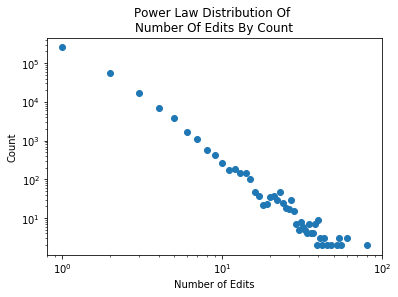

In [12]:
# histogram of number of edits
pipeline = [{'$group': {'_id': '$created.version', 'count': {'$sum': 1}}}, 
            {'$sort': {'count': -1, '_id': 1}}, 
            {'$limit': 50}]

version_dist = list(osm_data.aggregate(pipeline))
hist = [(vd['_id'], vd['count']) for vd in version_dist]

pprint.pprint(version_dist)

import matplotlib.pyplot as plt
%matplotlib inline

# take log log plot of histogram, roughly straight line implies power law
plt.plot(*zip(*hist), 'o')
plt.xscale('log')
plt.yscale('log')
plt.title('Power Law Distribution Of \nNumber Of Edits By Count')
plt.xlabel('Number of Edits')
plt.ylabel('Count');

In [13]:
# most edited elements
max_version = osm_data.find_one(sort=[('created.version', -1)])['created']['version']

pprint.pprint(list(osm_data.find({'created.version': max_version}, ['name', 'tag', 'created.version'])))

[{'_id': ObjectId('59bceb1c9d250b2eb76c0164'),
  'created': {'version': 463},
  'name': 'United States of America',
  'tag': 'relation'}]


In [101]:
from bson.code import Code

# define javascript map function
# basically an unwind on each document's dictionary keys/fields
map_function = Code("""
                    function() {
                        for (var tag_name in this) {
                            emit(tag_name, 1);
                        }
                    }
                    """)

# define javascript reduce function
# count the number of each tag
reduce_function = Code("""
                       function(tag_name, tag_count) {
                           return Array.sum(tag_count);
                       }
                       """)

# perform the map reduce and name the resulting collectoin 'cafe_tags_pct'
# use the query argument to filter out all documents that aren't cafes before performing the map reduce
osm_data.map_reduce(map_function, 
                    reduce_function, 
                    out='cafe_tags_pct',
                    query={'amenity': 'cafe'})
                          
ctp = db.cafe_tags_pct

# used for calculating the percentage
num_cafes = ctp.find_one({'_id': '_id'})['value']

# 1. Take out known common tags ('_id' and 'amenity', by the above map reduce query operation)
# 2. Calculate the percentage as the count of tags divided by the total number of cafe documents
# 3. Sort by percentage
# 4. Format to remove excessive precision and add '%' symbol
pipeline = [{'$match': {'_id': {'$nin': ['_id', 'amenity']}}}, 
            {'$project': {'pct': {'$multiply': [{'$divide': ['$value', num_cafes]}, 100]}}}, 
            {'$sort': {'pct': -1, '_id': 1}}, 
            {'$project': {'pct': {'$concat': [{'$substr': ['$pct', 0, 5]}, '%']}}}]

pprint.pprint(list(ctp.aggregate(pipeline)))

[{'_id': 'created', 'pct': '100%'},
 {'_id': 'id', 'pct': '100%'},
 {'_id': 'tag', 'pct': '100%'},
 {'_id': 'name', 'pct': '98.42%'},
 {'_id': 'pos', 'pct': '96.84%'},
 {'_id': 'cuisine', 'pct': '48.42%'},
 {'_id': 'address', 'pct': '35.26%'},
 {'_id': 'opening_hours', 'pct': '14.21%'},
 {'_id': 'website', 'pct': '12.63%'},
 {'_id': 'phone', 'pct': '10%'},
 {'_id': 'internet_access', 'pct': '8.947%'},
 {'_id': 'smoking', 'pct': '5.263%'},
 {'_id': 'takeaway', 'pct': '5.263%'},
 {'_id': 'source', 'pct': '4.736%'},
 {'_id': 'wheelchair', 'pct': '4.736%'},
 {'_id': 'wifi', 'pct': '4.736%'},
 {'_id': 'building', 'pct': '3.157%'},
 {'_id': 'node_refs', 'pct': '3.157%'},
 {'_id': 'outdoor_seating', 'pct': '2.631%'},
 {'_id': 'toilets', 'pct': '1.578%'},
 {'_id': 'wikidata', 'pct': '1.578%'},
 {'_id': 'designation', 'pct': '1.052%'},
 {'_id': 'diaper', 'pct': '1.052%'},
 {'_id': 'drive_through', 'pct': '1.052%'},
 {'_id': 'email', 'pct': '1.052%'},
 {'_id': 'operator', 'pct': '1.052%'},
 {'_i